Data Loaded Successfully.
Merged Dataset Shape: (184263, 23)

--- FINAL INSIGHTS SUMMARY ---
       Sentiment  Avg PnL ($)  Total Volume ($)  Trade Count
2          Greed    87.894859      1.155037e+08        36289
1           Fear    50.047622      7.041585e+08       133871
0  Extreme Greed    25.418772      3.940677e+07         6962
3        Neutral    22.229713      2.184323e+07         7141


/tmp/ipython-input-1371526614.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics, x='Sentiment', y='Avg PnL ($)', ax=axes[0], palette='viridis')
/tmp/ipython-input-1371526614.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics, x='Sentiment', y='Total Volume ($)', ax=axes[1], palette='Blues_d')
/tmp/ipython-input-1371526614.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics, x='Sentiment', y='Trade Count', ax=axes[2], palette='magma')



 Chart saved to 'outputs/trader_behavior_analysis.png'


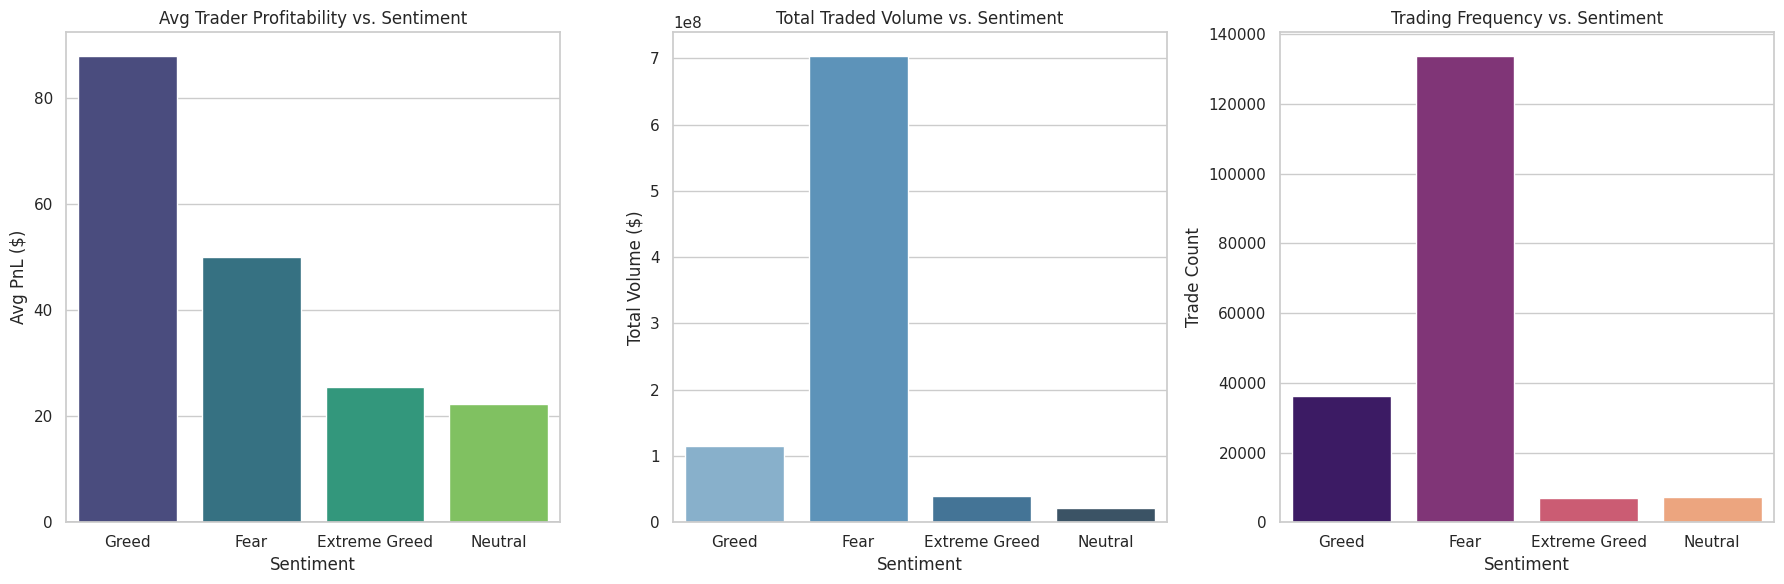

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. SETUP & DATA LOADING

try:
    df_sentiment = pd.read_csv('fear_greed_index.csv')
    df_trade = pd.read_csv('historical_data.csv')
    print("Data Loaded Successfully.")
except FileNotFoundError:
    print("Error: Please upload 'fear_greed_index.csv' and 'historical_data.csv' to Colab.")


# 2. DATA CLEANING & MERGING

df_sentiment['Date'] = pd.to_datetime(df_sentiment['date'])

df_trade['datetime'] = pd.to_datetime(df_trade['Timestamp'], unit='ms')
df_trade['date_only'] = df_trade['datetime'].dt.normalize()

merged_df = pd.merge(
    df_trade,
    df_sentiment,
    how='left',
    left_on='date_only',
    right_on='Date'
)

merged_df_clean = merged_df.dropna(subset=['classification'])
print(f"Merged Dataset Shape: {merged_df_clean.shape}")


# 3. ANALYSIS

sentiment_groups = merged_df_clean.groupby('classification')

# NOTE: 'Leverage' column is missing from the CSV, so I'm excluding it.
metrics = sentiment_groups.agg({
    'Closed PnL': 'mean',          # Profitability
    'Size USD': 'sum',             # Total Volume
    'Account': 'count'             # Activity (Trade Count)
}).reset_index()

metrics.columns = ['Sentiment', 'Avg PnL ($)', 'Total Volume ($)', 'Trade Count']
metrics = metrics.sort_values(by='Avg PnL ($)', ascending=False)

print("\n--- FINAL INSIGHTS SUMMARY ---")
print(metrics)


# 4. VISUALIZATION

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Chart 1: Profitability
sns.barplot(data=metrics, x='Sentiment', y='Avg PnL ($)', ax=axes[0], palette='viridis')
axes[0].set_title('Avg Trader Profitability vs. Sentiment')
axes[0].axhline(0, color='black', linewidth=1)

# Chart 2: Volume
sns.barplot(data=metrics, x='Sentiment', y='Total Volume ($)', ax=axes[1], palette='Blues_d')
axes[1].set_title('Total Traded Volume vs. Sentiment')

# Chart 3: Activity
sns.barplot(data=metrics, x='Sentiment', y='Trade Count', ax=axes[2], palette='magma')
axes[2].set_title('Trading Frequency vs. Sentiment')

plt.tight_layout()


if not os.path.exists('outputs'):
    os.makedirs('outputs')

plt.savefig('outputs/trader_behavior_analysis.png')
print("\n Chart saved to 'outputs/trader_behavior_analysis.png'")
plt.show()